In [1]:
import torch
import csv

def csv_to_list(csv_reader_object, list_object):
    for row in csv_reader_object:
        full_row = []
        for i in range(4):
            col = row[i].replace('(', '')
            col = col.replace(')', '')
            col = col.replace(',', ' ')
            col = col.split()
            full_row += [float(col[j]) for j in range(2)]
        list_object += [full_row]
        
interface = []
solution = []
target = []
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_training.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/solution_1_2_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_3_training.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target)
        
interface = torch.Tensor(interface)
#print(interface)

solution = torch.Tensor(solution)
#print(solution)

inp = torch.cat((interface, solution), 1)
#inp = solution
print(inp.size())

target = torch.Tensor(target)
#target += interface
print(target.size())
#print(inp)

torch.Size([384, 16])
torch.Size([384, 8])


In [2]:
interface_test = []
solution_test = []
target_test = []

with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_test)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/solution_1_2_test.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution_test)
        
        
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_3_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target_test)
        
interface_test = torch.Tensor(interface_test)
#print(interface_test)

solution_test = torch.Tensor(solution_test)
#print(solution_test)

inp_test = torch.cat((interface_test, solution_test), 1)
#inp_test = solution_test
print(inp_test.size())

target_test = torch.Tensor(target_test)
#target_test += interface_test
print(target_test.size())
#print(inp_test)

torch.Size([64, 16])
torch.Size([64, 8])


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Maxwell(nn.Module): #Definition des Netzes
    def __init__(self): #Deklarierung der Anzahl an Layern und Neuronen
        super(Maxwell, self).__init__()
        self.lin1 = nn.Linear(16, 500) #Input-Layer: 1 Neuron, 1. Hidden-Layer: 100 Neuronen
        self.lin2 = nn.Linear(500, 8) #2. Hidden-Layer: 50 Neuronen
        #self.lin3 = nn.Linear(100, 8) #Output-Layer: 1 Neuron
        
    def forward(self, x): #Deklarierung der Aktivierungsfunktionen pro Layer
        x = F.celu(self.lin1(x)) #Tangens Hyperbolicus
        x = self.lin2(x) #Identität
        #x = self.lin3(x) 
        return x
            
net = Maxwell() #Initialisierung des Netzes
print(net) #Ausgabe des Netzes

#print(net(inp))

Maxwell(
  (lin1): Linear(in_features=16, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=8, bias=True)
)


In [7]:
import torch.optim as optim
import time

start_time = time.time()

tol = 1e-5
max_iter = 1000
iterations = 0 #Anzahl der Trainingsschritte
loss = tol + 1

optimizer = optim.Adam(net.parameters(), lr=1e-5) #Wahl des Optimierungsverfahrens (hier: Adam) 
                                                   #inkl. Lernrate
criterion = nn.MSELoss() #Wahl der Errorfunktion (hier: MSE)

while(iterations < max_iter and loss > tol): #Training
    
    out = net(inp)

    optimizer.zero_grad()
    loss = criterion(out, target) #Berechnung des Fehlers
    loss_test = criterion(net(inp_test), target_test)
    print("Loss: %.5f" % loss, "Test-Loss: %.5f" % loss_test, "Iterations: %.0f" % (iterations+1)) #Ausgabe des Fehlers

    loss.backward() #Berechnung der Ableitung des Fehlers
    optimizer.step() #Optimierung der Netzparameter
    iterations += 1

print("Final Loss: %.5f" % loss) #Ausgabe des Fehlers nach dem Training

print("Number of iterations: %.0f" % iterations)

time_taken = time.time() - start_time
print("Run-Time: %.4f s" % time_taken) #Ausgabe der Laufzeit

Loss: 0.07781 Test-Loss: 0.11555 Iterations: 1
Loss: 0.07778 Test-Loss: 0.11555 Iterations: 2
Loss: 0.07776 Test-Loss: 0.11545 Iterations: 3
Loss: 0.07774 Test-Loss: 0.11551 Iterations: 4
Loss: 0.07771 Test-Loss: 0.11555 Iterations: 5
Loss: 0.07769 Test-Loss: 0.11547 Iterations: 6
Loss: 0.07767 Test-Loss: 0.11538 Iterations: 7
Loss: 0.07764 Test-Loss: 0.11536 Iterations: 8
Loss: 0.07762 Test-Loss: 0.11541 Iterations: 9
Loss: 0.07760 Test-Loss: 0.11545 Iterations: 10
Loss: 0.07757 Test-Loss: 0.11543 Iterations: 11
Loss: 0.07755 Test-Loss: 0.11537 Iterations: 12
Loss: 0.07752 Test-Loss: 0.11530 Iterations: 13
Loss: 0.07750 Test-Loss: 0.11528 Iterations: 14
Loss: 0.07748 Test-Loss: 0.11529 Iterations: 15
Loss: 0.07745 Test-Loss: 0.11532 Iterations: 16
Loss: 0.07743 Test-Loss: 0.11532 Iterations: 17
Loss: 0.07741 Test-Loss: 0.11528 Iterations: 18
Loss: 0.07738 Test-Loss: 0.11523 Iterations: 19
Loss: 0.07736 Test-Loss: 0.11519 Iterations: 20
Loss: 0.07733 Test-Loss: 0.11518 Iterations: 21
L

Loss: 0.07248 Test-Loss: 0.11190 Iterations: 218
Loss: 0.07246 Test-Loss: 0.11189 Iterations: 219
Loss: 0.07243 Test-Loss: 0.11187 Iterations: 220
Loss: 0.07241 Test-Loss: 0.11185 Iterations: 221
Loss: 0.07239 Test-Loss: 0.11184 Iterations: 222
Loss: 0.07236 Test-Loss: 0.11182 Iterations: 223
Loss: 0.07234 Test-Loss: 0.11181 Iterations: 224
Loss: 0.07231 Test-Loss: 0.11179 Iterations: 225
Loss: 0.07229 Test-Loss: 0.11177 Iterations: 226
Loss: 0.07226 Test-Loss: 0.11176 Iterations: 227
Loss: 0.07224 Test-Loss: 0.11174 Iterations: 228
Loss: 0.07222 Test-Loss: 0.11172 Iterations: 229
Loss: 0.07219 Test-Loss: 0.11171 Iterations: 230
Loss: 0.07217 Test-Loss: 0.11169 Iterations: 231
Loss: 0.07214 Test-Loss: 0.11167 Iterations: 232
Loss: 0.07212 Test-Loss: 0.11166 Iterations: 233
Loss: 0.07209 Test-Loss: 0.11164 Iterations: 234
Loss: 0.07207 Test-Loss: 0.11162 Iterations: 235
Loss: 0.07205 Test-Loss: 0.11161 Iterations: 236
Loss: 0.07202 Test-Loss: 0.11159 Iterations: 237
Loss: 0.07200 Test-L

Loss: 0.06671 Test-Loss: 0.10791 Iterations: 463
Loss: 0.06669 Test-Loss: 0.10790 Iterations: 464
Loss: 0.06667 Test-Loss: 0.10788 Iterations: 465
Loss: 0.06665 Test-Loss: 0.10786 Iterations: 466
Loss: 0.06662 Test-Loss: 0.10785 Iterations: 467
Loss: 0.06660 Test-Loss: 0.10783 Iterations: 468
Loss: 0.06658 Test-Loss: 0.10781 Iterations: 469
Loss: 0.06655 Test-Loss: 0.10780 Iterations: 470
Loss: 0.06653 Test-Loss: 0.10778 Iterations: 471
Loss: 0.06651 Test-Loss: 0.10777 Iterations: 472
Loss: 0.06649 Test-Loss: 0.10775 Iterations: 473
Loss: 0.06646 Test-Loss: 0.10773 Iterations: 474
Loss: 0.06644 Test-Loss: 0.10772 Iterations: 475
Loss: 0.06642 Test-Loss: 0.10770 Iterations: 476
Loss: 0.06640 Test-Loss: 0.10768 Iterations: 477
Loss: 0.06637 Test-Loss: 0.10767 Iterations: 478
Loss: 0.06635 Test-Loss: 0.10765 Iterations: 479
Loss: 0.06633 Test-Loss: 0.10764 Iterations: 480
Loss: 0.06630 Test-Loss: 0.10762 Iterations: 481
Loss: 0.06628 Test-Loss: 0.10760 Iterations: 482
Loss: 0.06626 Test-L

Loss: 0.06166 Test-Loss: 0.10421 Iterations: 692
Loss: 0.06163 Test-Loss: 0.10419 Iterations: 693
Loss: 0.06161 Test-Loss: 0.10418 Iterations: 694
Loss: 0.06159 Test-Loss: 0.10416 Iterations: 695
Loss: 0.06157 Test-Loss: 0.10415 Iterations: 696
Loss: 0.06155 Test-Loss: 0.10413 Iterations: 697
Loss: 0.06153 Test-Loss: 0.10411 Iterations: 698
Loss: 0.06151 Test-Loss: 0.10410 Iterations: 699
Loss: 0.06148 Test-Loss: 0.10408 Iterations: 700
Loss: 0.06146 Test-Loss: 0.10407 Iterations: 701
Loss: 0.06144 Test-Loss: 0.10405 Iterations: 702
Loss: 0.06142 Test-Loss: 0.10403 Iterations: 703
Loss: 0.06140 Test-Loss: 0.10402 Iterations: 704
Loss: 0.06138 Test-Loss: 0.10400 Iterations: 705
Loss: 0.06136 Test-Loss: 0.10399 Iterations: 706
Loss: 0.06134 Test-Loss: 0.10397 Iterations: 707
Loss: 0.06131 Test-Loss: 0.10395 Iterations: 708
Loss: 0.06129 Test-Loss: 0.10394 Iterations: 709
Loss: 0.06127 Test-Loss: 0.10392 Iterations: 710
Loss: 0.06125 Test-Loss: 0.10391 Iterations: 711
Loss: 0.06123 Test-L

Loss: 0.05674 Test-Loss: 0.10043 Iterations: 929
Loss: 0.05672 Test-Loss: 0.10042 Iterations: 930
Loss: 0.05670 Test-Loss: 0.10040 Iterations: 931
Loss: 0.05668 Test-Loss: 0.10038 Iterations: 932
Loss: 0.05666 Test-Loss: 0.10037 Iterations: 933
Loss: 0.05664 Test-Loss: 0.10035 Iterations: 934
Loss: 0.05662 Test-Loss: 0.10034 Iterations: 935
Loss: 0.05660 Test-Loss: 0.10032 Iterations: 936
Loss: 0.05658 Test-Loss: 0.10030 Iterations: 937
Loss: 0.05656 Test-Loss: 0.10029 Iterations: 938
Loss: 0.05654 Test-Loss: 0.10027 Iterations: 939
Loss: 0.05652 Test-Loss: 0.10026 Iterations: 940
Loss: 0.05650 Test-Loss: 0.10024 Iterations: 941
Loss: 0.05648 Test-Loss: 0.10022 Iterations: 942
Loss: 0.05646 Test-Loss: 0.10021 Iterations: 943
Loss: 0.05644 Test-Loss: 0.10019 Iterations: 944
Loss: 0.05642 Test-Loss: 0.10018 Iterations: 945
Loss: 0.05640 Test-Loss: 0.10016 Iterations: 946
Loss: 0.05638 Test-Loss: 0.10014 Iterations: 947
Loss: 0.05636 Test-Loss: 0.10013 Iterations: 948
Loss: 0.05634 Test-L

In [251]:
print(net(inp) - target)

tensor([[ 0.5525,  0.3194,  0.5341,  ..., -0.0104,  0.5803, -0.1317],
        [ 0.5056,  0.4710,  0.5181,  ...,  0.1348,  0.6107,  0.0040],
        [ 0.3723,  0.4937,  0.4192,  ...,  0.1876,  0.5685,  0.0556],
        ...,
        [ 0.5143, -1.1979, -0.1920,  ...,  0.2034, -1.8191,  0.9316],
        [ 0.8941, -0.9385,  0.0053,  ...,  0.5447, -1.9847,  1.2551],
        [ 1.4432, -0.7138,  0.4151,  ...,  1.0079, -1.8387,  1.7379]],
       grad_fn=<SubBackward0>)


In [120]:
print(net(inp_test), target_test)

tensor([[ 0.2005,  0.0763, -0.0746,  ..., -0.0337,  0.0387,  0.5203],
        [ 0.2013,  0.1565, -0.0074,  ..., -0.0396,  0.0359,  0.4821],
        [ 0.2331,  0.2246,  0.0599,  ..., -0.0779,  0.0203,  0.4111],
        ...,
        [-0.1364,  0.0570,  0.1130,  ..., -0.1227, -0.1900, -0.7996],
        [-0.1435,  0.1448,  0.1940,  ..., -0.0557, -0.2238, -0.7163],
        [-0.1131,  0.1421,  0.2235,  ..., -0.0518, -0.1972, -0.4950]],
       grad_fn=<AddmmBackward0>) tensor([[-0.1161, -0.4738, -0.0360,  ..., -0.5169,  0.1425, -0.5300],
        [ 0.1819, -0.5358,  0.2542,  ..., -0.5504,  0.4077, -0.5519],
        [ 0.4401, -0.5516,  0.4979,  ..., -0.5413,  0.6130, -0.5325],
        ...,
        [ 3.2141, 13.7851,  3.5071,  ..., 11.7304,  4.2586, 10.7713],
        [ 4.4435, 10.2448,  4.8025,  ...,  7.8449,  5.6498,  6.7455],
        [ 5.8455,  6.1475,  6.2131,  ...,  3.4639,  7.0235,  2.2560]])


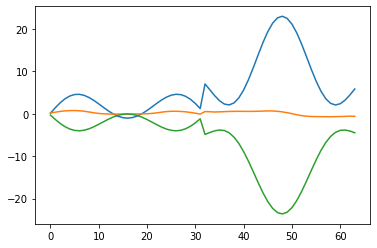

In [8]:
import matplotlib.pyplot as plt

interface_switched = []
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_switched)
    
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, interface_switched)
    
interface_switched = torch.Tensor(interface_switched)

interface_switched_test = []
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_1_0_1_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, interface_switched_test)
    
with open('/home/tobias/deal.ii-candi/deal.II-v9.2.0/examples/MA/KirasFM--minimal-example/interface_0_1_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_switched_test)

interface_switched_test = torch.Tensor(interface_switched_test)

n1 = 0
n2 = 384
n3 = 64

x1 = [i for i in range(n2)]
y11 = [target.tolist()[i][n1] for i in range(n2)]
y12 = [(net(inp) - target).tolist()[i][n1] for i in range(n2)]
#y13 = [(interface_switched - target).tolist()[i][n1] for i in range(n2)]
y13 = [(interface - target).tolist()[i][n1] for i in range(n2)]

x2 = [i for i in range(n3)]
y21 = [target_test.tolist()[i][n1] for i in range(n3)]
y22 = [(net(inp_test) - target_test).tolist()[i][n1] for i in range(n3)]
#y23 = [(interface_switched_test - target_test).tolist()[i][n1] for i in range(n3)]
y23 = [(interface_test - target_test).tolist()[i][n1] for i in range(n3)]
#print(x)

plt.plot(x2, y21)
#plt.plot(x1, y11)

plt.plot(x2, y22)
#plt.plot(x1, y12)

plt.plot(x2, y23)
#plt.plot(x1, y13)